In [1]:
import json
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#This code is used to show the relationship between the different types of tobacco used and the 
# frequency at which they are used within the state of Georgia. 

#Create a path and read data
tobacco_path = "Resources/Behavioral_Risk_Factor_Data__Tobacco_Use__2017-Georgia.csv"
tr = pd.read_csv(tobacco_path)

column_a = tr['Sample_Size']
column_b_percentages = tr['Data_Value']

# Convert percentage values to proportions
column_b_proportions = column_b_percentages / 100

# Multiply column A by the adjusted percentages
result = column_a * column_b_proportions

result = result.astype(int)

# Add the result as a new column in your DataFrame if needed
tr['Result_Column'] = result

tr

,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Sample_Size,Gender,Race,Age,Education,...,Data_Value_Footnote,Low_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Unit,Data_Value_Type,Data_Value,DataSource,TopicType,LocationAbbr,Result_Column
0,2017,Georgia,E-Cigarette Use (Adults),Frequency of Use,Some Days,100,Male,All Races,All Ages,All Grades,...,NaN,55.3,NaN,%,Percentage,66.0,BRFSS,Tobacco Use – Survey Data,GA,66
1,2017,Georgia,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,58,Female,All Races,All Ages,All Grades,...,NaN,32.7,NaN,%,Percentage,50.8,BRFSS,Tobacco Use – Survey Data,GA,29
2,2017,Georgia,Cigarette Use (Adults),Smoking Frequency,Every Day,462,Male,All Races,All Ages,All Grades,...,NaN,57.4,NaN,%,Percentage,62.8,BRFSS,Tobacco Use – Survey Data,GA,290
3,2017,Georgia,Cigarette Use (Adults),Smoking Status,Current,5726,Overall,All Races,All Ages,All Grades,...,NaN,16.2,NaN,%,Percentage,17.5,BRFSS,Tobacco Use – Survey Data,GA,1002
4,2017,Georgia,E-Cigarette Use (Adults),Frequency of Use,Every Day,89,Female,All Races,All Ages,All Grades,...,NaN,31.8,NaN,%,Percentage,44.6,BRFSS,Tobacco Use – Survey Data,GA,39
5,2017,Georgia,Cigarette Use (Adults),Smoking Frequency,Some Days,462,Male,All Races,All Ages,All Grades,...,NaN,31.8,NaN,%,Percentage,37.2,BRFSS,Tobacco Use – Survey Data,GA,171
6,2017,Georgia,Cigarette Use (Adults),Smoking Status,Current,3256,Female,All Races,All Ages,All Grades,...,NaN,12.6,NaN,%,Percentage,14.3,BRFSS,Tobacco Use – Survey Data,GA,465
7,2017,Georgia,E-Cigarette Use (Adults),User Status,Current,3236,Female,All Races,All Ages,All Grades,...,NaN,2.7,NaN,%,Percentage,3.6,BRFSS,Tobacco Use – Survey Data,GA,116
8,2017,Georgia,Smokeless Tobacco Use (Adults),User Status,Current,5744,Overall,All Races,All Ages,All Grades,...,NaN,3.8,NaN,%,Percentage,4.5,BRFSS,Tobacco Use – Survey Data,GA,258
9,2017,Georgia,Smokeless Tobacco Use (Adults),User Status,Current,3266,Female,All Races,All Ages,All Grades,...,NaN,1.3,NaN,%,Percentage,2.0,BRFSS,Tobacco Use – Survey Data,GA,65


In [4]:
#Find all the different types of tobacco within the datafame
topic = len(tr["TopicDesc"].unique())
topic_name = tr["TopicDesc"].unique()

print(topic)
topic_name

3


array(['E-Cigarette Use (Adults)', 'Smokeless Tobacco Use (Adults)',
       'Cigarette Use (Adults)'], dtype=object)

In [5]:
#Total amount of participants
sample_total = tr['Result_Column'].sum()
print(f'Total amount of participants are {sample_total}')

Total amount of participants are 5498


In [13]:
values_column = tr['Data_Value']  
weights_column = tr['Sample_Size']  

# Calculate the weighted average
weighted_avg = np.average(values_column, weights=weights_column)
print("Weighted Average:", round(weighted_avg, 2))

median_value = tr['Data_Value'].median()
print("Median:", median_value)

range_value = tr['Data_Value'].max() - tr['Data_Value'].min()
print("Range:", round(range_value, 2))

Weighted Average: 13.99
Median: 38.5
Range: 67.8


Total amount of E-Cigarette Use (Adults) are 872
Total amount of Smokeless Tobacco Use (Adults) are 940
Total amount of Cigarette Use (Adults) are 3686


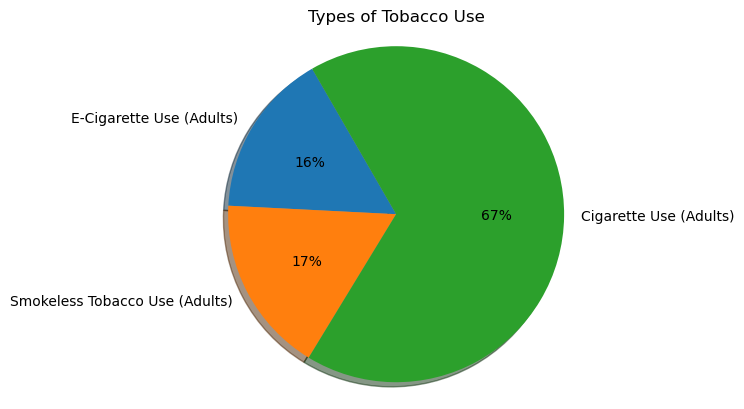

In [7]:
#Create a funcition to determine the amount of each tobacco product type
def total_smokers(topic_desc, tr):
    smoker = tr[tr["TopicDesc"] == topic_desc]
    smoker_sum = smoker['Result_Column'].sum()
    print(f'Total amount of {topic_desc} are {smoker_sum}')
    return smoker_sum

topic_descs = ['E-Cigarette Use (Adults)', 'Smokeless Tobacco Use (Adults)',
       'Cigarette Use (Adults)']

smoker_sums = {topic_desc: total_smokers(topic_desc, tr) for topic_desc in topic_descs}

#Pie graph to help visualize the size difference between the different tobacco type
labels = topic_descs
sizes = [smoker_sums[topic_desc]for topic_desc in topic_descs]
plt.pie(sizes, labels=topic_descs, autopct='%1.0f%%', startangle=120, shadow=True)
plt.axis("equal")
plt.title("Types of Tobacco Use")

plt.show()    

Based on the information above it is clear that cigarette use is the most commonly used tobacco product. The amount of both Smokeless and E-cigarette users are similair in size.  

In [8]:
#Determine the different frequency users
frequency = tr["Response"].unique()
frequency

array(['Some Days', 'Every Day', 'Current'], dtype=object)

Total amount of Every Day users: 1517
Total amount of Current users: 2980
Total amount of Some Days users: 1001


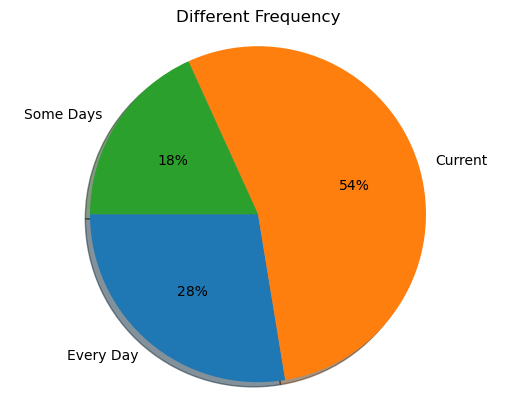

In [9]:
#Create a funcition to determine the amount of each frequency
def total_freq(response, tr):
    sum_data = tr[tr["Response"] == response]
    total_sum = sum_data['Result_Column'].sum()
    print(f'Total amount of {response} users: {total_sum}')
    return total_sum

responses = ["Every Day", "Current", "Some Days"]

sums = {response: total_freq(response, tr) for response in responses}

#Pie graph to visualize the different frequency of smokers
labels = responses
sizes = [sums[response]for response in responses]
plt.pie(sizes, labels=responses, autopct='%1.0f%%', startangle=180, shadow=True)
plt.axis("equal")
plt.title("Different Frequency")

plt.show()

 A complication that our team came across while reading and creating charts was under the Frequency column there were three different types and one being "Current". Current did not specify exactly if the users were either a everyday or some day user. Perhaps in future surveys a recommedation would be to further explain what Current indicated. Overall it can be inferred that more users used tobacco more oftern than some days. 

For E-Cigarette Use (Adults)  - 145 are Every Day users
----------------------------------------------
For Cigarette Use (Adults)  - 1123 are Every Day users
----------------------------------------------
For Smokeless Tobacco Use (Adults)  - 249 are Every Day users
----------------------------------------------
For E-Cigarette Use (Adults)  - 231 are Some Days users
----------------------------------------------
For Cigarette Use (Adults)  - 580 are Some Days users
----------------------------------------------
For Smokeless Tobacco Use (Adults)  - 190 are Some Days users
----------------------------------------------
For E-Cigarette Use (Adults)  - 496 are Current users
----------------------------------------------
For Cigarette Use (Adults)  - 1983 are Current users
----------------------------------------------
For Smokeless Tobacco Use (Adults)  - 501 are Current users
----------------------------------------------


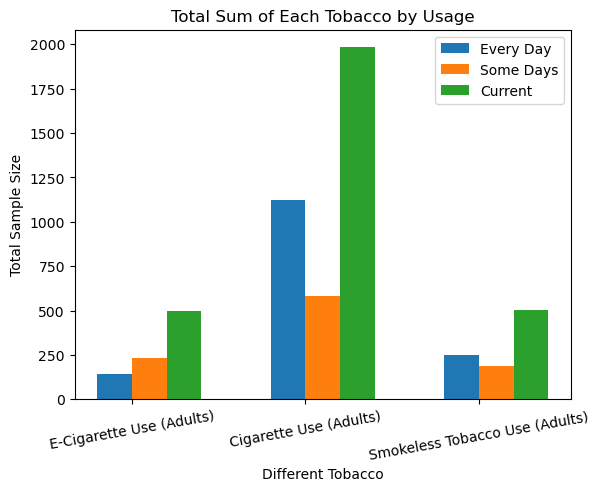

In [10]:
#A function to determine the sum amount of each frequency per each type of tobacco
def calculate_sum(response, topic_desc, tr):
    data = tr[(tr["Response"] == response) & (tr["TopicDesc"] == topic_desc)]
    total_sum = data['Result_Column'].sum()
    print(f"For {topic_desc}  - {total_sum} are {response} users")
    print(f'----------------------------------------------')
    return total_sum

responses = ['Every Day', 'Some Days', 'Current']
topics = ['E-Cigarette Use (Adults)', 'Cigarette Use (Adults)', 'Smokeless Tobacco Use (Adults)']

#Bar graph to visualize the frequency of each type of tobacco
result_dict = {}

for response in responses:
    result_dict[response] = [calculate_sum(response, topic, tr) for topic in topics]

bar_width = 0.2
r = np.arange(len(topics))

fig, ax = plt.subplots()

for i, (response, values) in enumerate(result_dict.items()):
    ax.bar(r + i * bar_width, values, width=bar_width, label=response)
    
ax.set_xlabel('Different Tobacco')
ax.set_ylabel('Total Sample Size')
ax.set_title('Total Sum of Each Tobacco by Usage')
ax.set_xticks(r + (len(responses) - 1) * bar_width / 4)
ax.set_xticklabels(topics, rotation=10, ha="center")
ax.legend(loc=0)

plt.show()